## Lasso regression for sparse data

In [236]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [238]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import class_FM as FM
from sklearn import preprocessing
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from itertools import combinations

### Initialize factorial model and sample dataset for k=3

In [239]:
n = 1000
k = 3
degree = 3
sigma = 0.1
sparsity = 0.5

fm = FM.FactorialModel(
    n=n,
    k=k,
    degree=degree,
    sigma=sigma,
    sparsity=sparsity,
    beta_seed=42,
)
t, y = fm.sample(seed=0)


### Fit Lasso regression with cross validation for alpha

In [240]:
pf = preprocessing.PolynomialFeatures(
    degree=degree, interaction_only=True, include_bias=True,
)
T = pf.fit_transform(t)
T_train, T_test, y_train, y_test = train_test_split(T, y, test_size=0.2, random_state=42)
alpha_cv = [0.001, 0.01, 0.1, 0.5]
model = LassoCV(alphas=alpha_cv, cv=5, random_state=42)
model.fit(T_train, y_train)
print(f'alpha={model.alpha_}\nbetas={model.coef_}')

y_pred = model.predict(T_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error of y: {mse}")

beta_actual = fm.beta
beta_hat = model.coef_
mse_beta = mean_squared_error(beta_actual, beta_hat)
print(f"Mean Squared Error of beta: {mse_beta}")

alpha=0.001
betas=[ 0.         -0.4637748   0.          0.00316042 -0.86222917 -0.00868506
  0.03107935 -0.11330512]
Mean Squared Error of y: 0.010163565628389128
Mean Squared Error of beta: 0.00020646901975851506


### Compute expected outcomes as linear combinations of betas

In [241]:
betas = model.coef_
beta_mask = pf.fit_transform(pf.powers_)
expected_outcomes = beta_mask @ betas
print(f'expected_outcomes={np.round(expected_outcomes,2)}')

expected_outcomes=[ 0.   -0.46  0.    0.   -1.33 -0.47  0.03 -1.41]


### Cluster treatment combinations by expected outcomes

In [242]:
for i in range(1, 2**k):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(expected_outcomes.reshape(-1, 1))
    score = kmeans.score(expected_outcomes.reshape(-1, 1))
    print(f'Max clusters: {i}; cluster labels: {kmeans.labels_}; score: {score:.2f}')

Max clusters: 1; cluster labels: [0 0 0 0 0 0 0 0]; score: -2.54
Max clusters: 2; cluster labels: [1 1 1 1 0 1 1 0]; score: -0.31
Max clusters: 3; cluster labels: [1 2 1 1 0 2 1 0]; score: -0.00
Max clusters: 4; cluster labels: [1 2 1 1 0 2 1 3]; score: -0.00
Max clusters: 5; cluster labels: [1 2 1 1 0 2 4 3]; score: -0.00
Max clusters: 6; cluster labels: [1 5 1 1 0 2 4 3]; score: -0.00
Max clusters: 7; cluster labels: [6 5 6 1 0 2 4 3]; score: -0.00


### Plot betas and expected outcomes

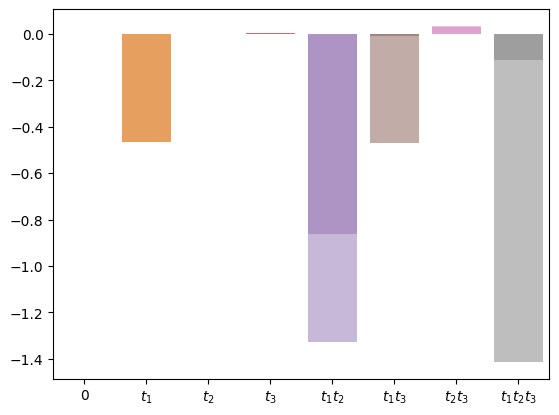

In [243]:
_ = sns.barplot(
    x=[
        r"0",
        r"$t_1$",
        r"$t_2$",
        r"$t_3$",
        r"$t_1 t_2$",
        r"$t_1 t_3$",
        r"$t_2 t_3$",
        r"$t_1 t_2 t_3$",
    ],
    y=betas,
    alpha=0.5,
    label=r"$\beta$",
)

_ = sns.barplot(
    x=[
        r"0",
        r"$t_1$",
        r"$t_2$",
        r"$t_3$",
        r"$t_1 t_2$",
        r"$t_1 t_3$",
        r"$t_2 t_3$",
        r"$t_1 t_2 t_3$",
    ],
    y=expected_outcomes,
    alpha=0.5,
    label=r"E[Y|T]",
)

### Factorial model and sample dataset for k=4

In [244]:
n = 1000
k = 4
degree = 4
sigma = 0.1
sparsity = 0.5

fm = FM.FactorialModel(
    n=n,
    k=k,
    degree=degree,
    sigma=sigma,
    sparsity=sparsity,
    beta_seed=42,
)
t, y = fm.sample(seed=0)

In [245]:
# Fit Lasso regression with cross validation for alpha
pf = preprocessing.PolynomialFeatures(
    degree=degree, interaction_only=True, include_bias=True,
)
T = pf.fit_transform(t)
T_train, T_test, y_train, y_test = train_test_split(T, y, test_size=0.2, random_state=42)
alpha_cv = [0.001, 0.01, 0.1, 0.5]
model = LassoCV(alphas=alpha_cv, cv=5, random_state=42)
model.fit(T_train, y_train)
print(f'alpha={model.alpha_}\nbetas={model.coef_}')

y_pred = model.predict(T_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error of y: {mse}")

beta_actual = fm.beta
beta_hat = model.coef_
mse_beta = mean_squared_error(beta_actual, beta_hat)
print(f"Mean Squared Error of beta: {mse_beta}")

alpha=0.001
betas=[ 0.         -0.543451    0.3862214   0.4831172   0.         -0.01750211
  0.06066966 -0.15994355  0.00780474  0.01052252  0.01000153 -0.
 -0.01050108 -0.          0.18682475 -0.41272694]
Mean Squared Error of y: 0.009933492641711969
Mean Squared Error of beta: 0.0003990872937720269


In [246]:
# Compute expected outcomes as linear combinations of betas
betas = model.coef_
beta_mask = pf.fit_transform(pf.powers_)
expected_outcomes = beta_mask @ betas
print(f'expected_outcomes={np.round(expected_outcomes,2)}')

expected_outcomes=[ 0.   -0.54  0.39  0.48  0.   -0.17  0.   -0.7   0.88  0.4   0.49  0.38
 -0.33 -0.15  1.08  0.  ]


In [247]:
print(betas.shape, expected_outcomes.shape)

(16,) (16,)


In [248]:
# Cluster treatment combinations by expected outcomes
for i in range(1, 2**k):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(expected_outcomes.reshape(-1, 1))
    score = kmeans.score(expected_outcomes.reshape(-1, 1))
    print(f'Max clusters: {i}; cluster labels: {kmeans.labels_}; score: {score:.2f}')

Max clusters: 1; cluster labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]; score: -3.53
Max clusters: 2; cluster labels: [0 0 1 1 0 0 0 0 1 1 1 1 0 0 1 0]; score: -1.02
Max clusters: 3; cluster labels: [2 0 1 1 2 2 2 0 1 1 1 1 0 2 1 2]; score: -0.58
Max clusters: 4; cluster labels: [3 0 1 1 3 3 3 0 2 1 1 1 0 3 2 3]; score: -0.14
Max clusters: 5; cluster labels: [3 4 1 1 3 0 3 4 2 1 1 1 0 0 2 3]; score: -0.07
Max clusters: 6; cluster labels: [0 3 2 2 0 4 0 3 5 2 2 2 4 4 1 0]; score: -0.05
Max clusters: 7; cluster labels: [3 4 1 1 3 5 3 4 6 1 1 1 0 5 2 3]; score: -0.03
Max clusters: 8; cluster labels: [4 6 2 2 4 1 4 3 0 2 2 2 7 1 5 4]; score: -0.01
Max clusters: 9; cluster labels: [2 8 7 1 2 5 2 4 3 7 1 7 0 5 6 2]; score: -0.00
Max clusters: 10; cluster labels: [2 8 7 1 2 5 2 4 3 7 1 7 0 9 6 2]; score: -0.00
Max clusters: 11; cluster labels: [ 2  8  7  1  2  5  2  4  3 10  1  7  0  9  6  2]; score: -0.00
Max clusters: 12; cluster labels: [ 2  8  7 11  2  5  2  4  3 10  1  7  0  9  6  2]; score:

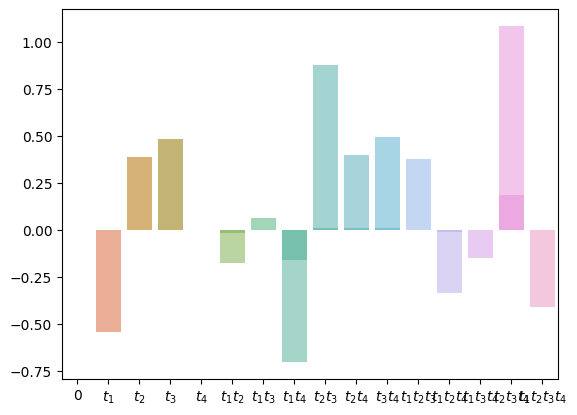

In [249]:
# Plot betas and expected outcomes
_ = sns.barplot(
    x=[
        r"0",
        r"$t_1$",
        r"$t_2$",
        r"$t_3$",
        r"$t_4$",
        r"$t_1 t_2$",
        r"$t_1 t_3$",
        r"$t_1 t_4$",
        r"$t_2 t_3$",
        r"$t_2 t_4$",
        r"$t_3 t_4$",
        r"$t_1 t_2 t_3$",
        r"$t_1 t_2 t_4$",
        r"$t_1 t_3 t_4$",
        r"$t_2 t_3 t_4$",
        r"$t_1 t_2 t_3 t_4$",
    ],
    y=betas,
    alpha=0.5,
    label=r"$\beta$",
)

_ = sns.barplot(
    x=[
        r"0",
        r"$t_1$",
        r"$t_2$",
        r"$t_3$",
        r"$t_4$",
        r"$t_1 t_2$",
        r"$t_1 t_3$",
        r"$t_1 t_4$",
        r"$t_2 t_3$",
        r"$t_2 t_4$",
        r"$t_3 t_4$",
        r"$t_1 t_2 t_3$",
        r"$t_1 t_2 t_4$",
        r"$t_1 t_3 t_4$",
        r"$t_2 t_3 t_4$",
        r"$t_1 t_2 t_3 t_4$",
    ],
    y=expected_outcomes,
    alpha=0.5,
    label=r"E[Y|T]",
)

### Factorial model and sample dataset for k=5

In [250]:
n = 1000
k = 5
degree = 5
sigma = 0.1
sparsity = 0.5

fm = FM.FactorialModel(
    n=n,
    k=k,
    degree=degree,
    sigma=sigma,
    sparsity=sparsity,
    beta_seed=42,
)
t, y = fm.sample(seed=0)

In [251]:
# Fit Lasso regression with cross validation for alpha
pf = preprocessing.PolynomialFeatures(
    degree=degree, interaction_only=True, include_bias=True,
)
T = pf.fit_transform(t)
T_train, T_test, y_train, y_test = train_test_split(T, y, test_size=0.2, random_state=42)
alpha_cv = [0.001, 0.01, 0.1, 0.5]
model = LassoCV(alphas=alpha_cv, cv=5, random_state=42)
model.fit(T_train, y_train)
print(f'alpha={model.alpha_}\nbetas={model.coef_}')

y_pred = model.predict(T_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error of y: {mse}")

beta_actual = fm.beta
beta_hat = model.coef_
mse_beta = mean_squared_error(beta_actual, beta_hat)
print(f"Mean Squared Error of beta: {mse_beta}")

alpha=0.001
betas=[ 0.         -0.00615014  0.36288005  0.          0.00563909  0.00419086
  0.00781563 -0.0254381   0.          0.          0.03989441  0.0122317
 -0.          0.          0.17361246 -0.43732393  0.19791085  0.
  0.08772841 -0.         -0.          0.          0.5031516  -0.
 -0.1523685  -0.15900049 -0.          0.          0.         -0.02823868
 -0.         -0.        ]
Mean Squared Error of y: 0.010939823856963767
Mean Squared Error of beta: 0.005701355170458555


In [252]:
# Compute expected outcomes as linear combinations of betas
betas = model.coef_
beta_mask = pf.fit_transform(pf.powers_)
expected_outcomes = beta_mask @ betas
print(f'expected_outcomes={np.round(expected_outcomes,2)}')

expected_outcomes=[ 0.   -0.01  0.36  0.    0.01  0.    0.36 -0.03 -0.   -0.    0.4   0.38
  0.37  0.01  0.18 -0.43  0.58  0.38  0.46 -0.03  0.15 -0.43  0.92  0.58
 -0.2  -0.41  1.1   0.84 -0.12 -0.47  0.35  0.59]


In [253]:
print(betas.shape, expected_outcomes.shape)

(32,) (32,)


In [254]:
# Cluster treatment combinations by expected outcomes
for i in range(1, 2**k):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(expected_outcomes.reshape(-1, 1))
    score = kmeans.score(expected_outcomes.reshape(-1, 1))
    print(f'Max clusters: {i}; cluster labels: {kmeans.labels_}; score: {score:.2f}')

Max clusters: 1; cluster labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]; score: -4.76
Max clusters: 2; cluster labels: [1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 1 1 0 0 1 1 0 0]; score: -1.45
Max clusters: 3; cluster labels: [1 1 0 1 1 1 0 1 1 1 0 0 0 1 0 1 0 0 0 1 0 1 2 0 1 1 2 2 1 1 0 0]; score: -0.80
Max clusters: 4; cluster labels: [1 1 3 1 1 1 3 1 1 1 3 3 3 1 1 0 3 3 3 1 1 0 2 3 0 0 2 2 1 0 3 3]; score: -0.24
Max clusters: 5; cluster labels: [1 1 0 1 1 1 0 1 1 1 0 0 0 1 1 3 4 0 0 1 1 3 2 4 1 3 2 2 1 3 0 4]; score: -0.15
Max clusters: 6; cluster labels: [4 4 5 4 4 4 5 4 4 4 5 5 5 4 0 2 3 5 5 4 0 2 1 3 4 2 1 1 4 2 5 3]; score: -0.09
Max clusters: 7; cluster labels: [2 2 0 2 2 2 0 2 2 2 0 0 0 2 5 1 4 0 0 2 5 1 3 4 6 1 3 3 6 1 0 4]; score: -0.05
Max clusters: 8; cluster labels: [5 5 0 5 5 5 0 5 5 5 0 0 0 5 6 3 4 0 0 5 6 3 2 4 1 3 7 2 1 3 0 4]; score: -0.02
Max clusters: 9; cluster labels: [4 4 1 4 4 4 1 4 4 4 1 1 1 4 6 3 5 1 8 4 6 3 2 5 0 3 7 2 0 3 1 

/tmp/ipykernel_141/426641171.py:3: ConvergenceWarning: Number of distinct clusters (30) found smaller than n_clusters (31). Possibly due to duplicate points in X.
  kmeans = KMeans(n_clusters=i, random_state=0).fit(expected_outcomes.reshape(-1, 1))


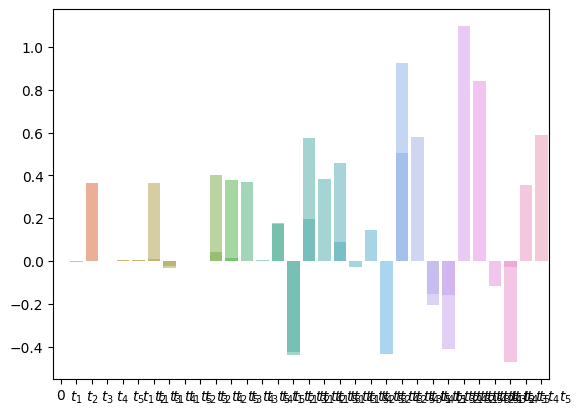

In [255]:
# Plot betas and expected outcomes
_ = sns.barplot(
    x=[
        r"0",
        r"$t_1$",
        r"$t_2$",
        r"$t_3$",
        r"$t_4$",
        r"$t_5$",
        r"$t_1 t_2$",
        r"$t_1 t_3$",
        r"$t_1 t_4$",
        r"$t_1 t_5$",
        r"$t_2 t_3$",
        r"$t_2 t_4$",
        r"$t_2 t_5$",
        r"$t_3 t_4$",
        r"$t_3 t_5$",
        r"$t_4 t_5$",
        r"$t_1 t_2 t_3$",
        r"$t_1 t_2 t_4$",
        r"$t_1 t_2 t_5$",
        r"$t_1 t_3 t_4$",
        r"$t_1 t_3 t_5$",
        r"$t_1 t_4 t_5$",
        r"$t_2 t_3 t_4$",
        r"$t_2 t_3 t_5$",
        r"$t_2 t_4 t_5$",
        r"$t_3 t_4 t_5$",
        r"$t_1 t_2 t_3 t_4$",
        r"$t_1 t_2 t_3 t_5$",
        r"$t_1 t_2 t_4 t_5$",
        r"$t_1 t_3 t_4 t_5$",
        r"$t_2 t_3 t_4 t_5$",
        r"$t_1 t_2 t_3 t_4 t_5$",
    ],
    y=betas,
    alpha=0.5,
    label=r"$\beta$",
)

_ = sns.barplot(
    x=[
        r"0",
        r"$t_1$",
        r"$t_2$",
        r"$t_3$",
        r"$t_4$",
        r"$t_5$",
        r"$t_1 t_2$",
        r"$t_1 t_3$",
        r"$t_1 t_4$",
        r"$t_1 t_5$",
        r"$t_2 t_3$",
        r"$t_2 t_4$",
        r"$t_2 t_5$",
        r"$t_3 t_4$",
        r"$t_3 t_5$",
        r"$t_4 t_5$",
        r"$t_1 t_2 t_3$",
        r"$t_1 t_2 t_4$",
        r"$t_1 t_2 t_5$",
        r"$t_1 t_3 t_4$",
        r"$t_1 t_3 t_5$",
        r"$t_1 t_4 t_5$",
        r"$t_2 t_3 t_4$",
        r"$t_2 t_3 t_5$",
        r"$t_2 t_4 t_5$",
        r"$t_3 t_4 t_5$",
        r"$t_1 t_2 t_3 t_4$",
        r"$t_1 t_2 t_3 t_5$",
        r"$t_1 t_2 t_4 t_5$",
        r"$t_1 t_3 t_4 t_5$",
        r"$t_2 t_3 t_4 t_5$",
        r"$t_1 t_2 t_3 t_4 t_5$",
    ],
    y=expected_outcomes,
    alpha=0.5,
    label=r"E[Y|T]",
)

### Generate data for m less than sp

In [256]:
#s = sparsity * len(beta)
#if k is 10: 88
# so error low if 88 * log(176) >= 197
def run_generation(n_max, k, sparsity, step):
    mse_dict = {}
    for n in range(20, n_max, step):
        #dictionary for mse's
        
        degree = k
        sigma = 0.1

        fm = FM.FactorialModel(
            n=n,
            k=k,
            degree=degree,
            sigma=sigma,
            sparsity=sparsity,
            beta_seed=42,
        )
        t, y = fm.sample(seed=0)


        pf = preprocessing.PolynomialFeatures(
        degree=degree, interaction_only=True, include_bias=True,
        )
        T = pf.fit_transform(t)
        T_train, T_test, y_train, y_test = train_test_split(T, y, test_size=0.2, random_state=42)
        alpha_cv = [0.001, 0.01, 0.1, 0.5]
        model = LassoCV(alphas=alpha_cv, cv=5, random_state=42, max_iter=10000)
        model.fit(T_train, y_train)
        # print(f'alpha={model.alpha_}\nbetas={model.coef_}')

        y_pred = model.predict(T_test)
        mse = mean_squared_error(y_test, y_pred)
        # print(f"Mean Squared Error of y: {mse}")

        beta_actual = fm.beta
        beta_hat = model.coef_
        mse_beta = mean_squared_error(beta_actual, beta_hat)
        # print(f"Mean Squared Error of beta: {mse_beta}")

        mse_dict[n] = (mse, mse_beta)
    return mse_dict, len(fm.beta)

In [257]:
def draw_charts(mse_dict):
    n = list(mse_dict.keys())
    mse, mse_beta = zip(*mse_dict.values())

    fig, ax1 = plt.subplots()

    # Plot the first line (mse) on the first y-axis
    color = 'tab:red'
    ax1.set_xlabel('n')
    ax1.set_ylabel('mse', color=color)
    ax1.plot(n, mse, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    # Create a second y-axis for the second line (mse_beta)
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('mse_beta', color=color)
    ax2.plot(n, mse_beta, color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # For layout
    plt.title('MSE and MSE_Beta vs n')
    plt.show()

In [258]:
def calc_tipping_point(sparsity, length, k):
    return k * (1-sparsity) * length

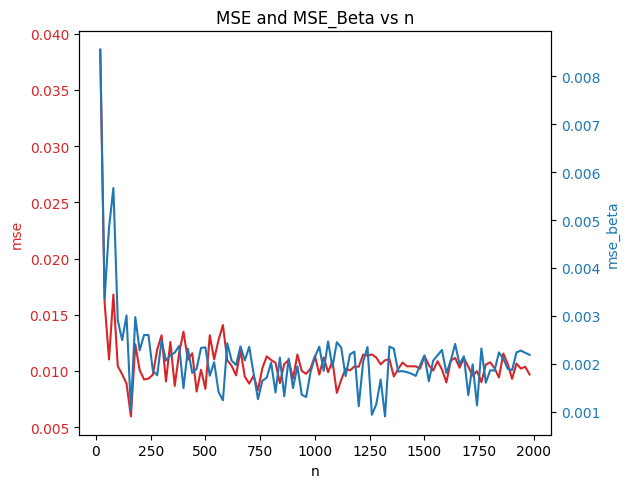

31.999999999999993


In [259]:
n_max = 2000
k = 5
sparsity = 0.8
mse_dict, length = run_generation(n_max, k, sparsity, 20)
draw_charts(mse_dict)
print(calc_tipping_point(sparsity, length, k))

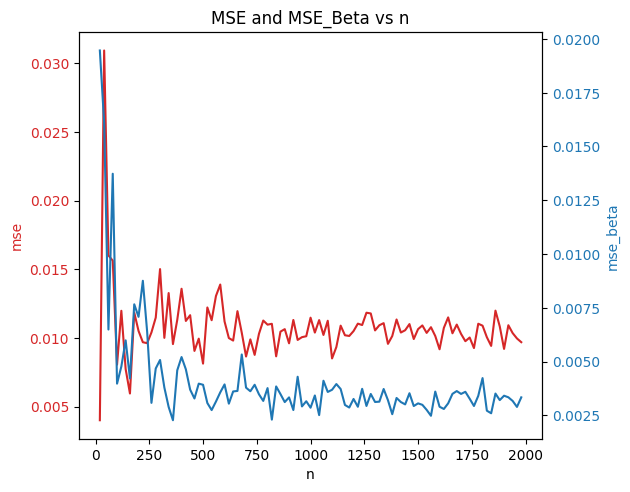

128.0


In [260]:
n_max = 2000
k = 5
sparsity = 0.2
mse_dict, length = run_generation(n_max, k, sparsity, 20)
draw_charts(mse_dict)
print(calc_tipping_point(sparsity, length, k))

In [261]:
n_max = 2000
k = 10
sparsity = 0.2
mse_dict, length = run_generation(n_max, k, sparsity, 20)
draw_charts(mse_dict)
print(calc_tipping_point(sparsity, length, k))


KeyboardInterrupt



# Compare with Forward - Non-Heredity

In [270]:
fm = FM.FactorialModel(
    n=30,
    k=3,
    degree=5,
    sigma=0.1,
    sparsity=0.8,
    beta_seed=40,
    antiheredity=True
)
t, y = fm.sample(seed=0, contrast_coding = True)


In [271]:
t_train, t_test, y_train, y_test = train_test_split(t, y, test_size=0.01, random_state=40)
alpha_cv = [0.001, 0.01, 0.1, 0.5]
model = LassoCV(alphas=alpha_cv, cv=5, random_state=40, max_iter=10000)
model.fit(t_train, y_train)
# print(f'alpha={model.alpha_}\nbetas={model.coef_}')
y_pred = model.predict(t_test)
mse = mean_squared_error(y_test, y_pred)
# print(f"Mean Squared Error of y: {mse}")
beta_actual = fm.beta
beta_hat = model.coef_
# beta_hat[beta_hat != 0] = 1
# beta_actual[beta_actual != 0] = 1
# mse_beta= zero_one_loss(beta_actual, beta_hat)
print(beta_actual)

[ 0.          0.          0.          0.          0.         -0.9339573
 -0.35738462  0.        ]


In [272]:
#forward selection
T_train, T_test, y_train, y_test = train_test_split(t, y, test_size=0.01, random_state=40)
T_train = pd.DataFrame(T_train)
y_train = pd.DataFrame(y_train)
kept_features = forward_selection(T_train, y_train, 0.05)
print(kept_features)
for i in range(5):
    kept_features = interactions(T_train, y_train, 0.05, kept_features)

[1, 0]
[]
[]
[]
[]
[]


/tmp/ipykernel_141/612057534.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
/tmp/ipykernel_141/612057534.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
/tmp/ipykernel_141/612057534.py:11: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
/tmp/ipykernel_141/612057534.py:38: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  new_pval = pd.Series(index=remaining_features)
/tmp/ipykernel_1

In [273]:
#lasso
pf = preprocessing.PolynomialFeatures(
degree=4, interaction_only=True, include_bias=True,
)
T = pf.fit_transform(t)

t_train, t_test, y_train, y_test = train_test_split(T, y, test_size=0.01, random_state=40)
alpha_cv = [0.001, 0.01, 0.1, 0.5]
model = Lasso(alpha=0.001, max_iter=10000)
model.fit(t_train, y_train)
print(model.coef_)

[ 0.          0.          0.01399958  0.0158602  -0.0175177  -0.9525845
 -0.36990425 -0.01306284]
